In [1]:
import pandas as pd
import numpy as np 


In [4]:
import geopandas as gpd
from shapely.geometry import Point, Polygon 

In [411]:
dataset = pd.read_excel('Dataset for analysis.xlsx')

## Handling Missing Values

In [401]:
dataset = dataset.replace('-1', np.nan)
dataset = dataset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

ID  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0            1               527200.0                178760.0  -0.169101   
1            2               524930.0                181430.0  -0.200838   
2            3               525860.0                178080.0  -0.188636   
3            4               524980.0                181030.0  -0.200259   
4            5               526170.0                179200.0  -0.183773   
5            6               526090.0                177600.0  -0.185496   
6            7               527780.0                179680.0  -0.160418   
7            8               524010.0                182080.0  -0.213862   
8            9               527710.0                179290.0  -0.161567   
9           10               525120.0                180060.0  -0.198587   
10          11               525720.0                179680.0  -0.190082   
11          12               524720.0                179100.0  -0.204686   
12          13               525200.0                180430.0  -0.197303   
13          14               524460.0                181000.0  -0.207760   
14          15               524350.0                181210.0  -0.209270   
15          16               526460.0                177460.0  -0.180220   
16          17               524170.0                180690.0  -0.212046   
17          18               526930.0                177480.0  -0.173448   
18          19               525260.0                179000.0  -0.196947   
19          20               525370.0                180260.0  -0.194916   
20          21               525160.0                180720.0  -0.197777   
21          22               525040.0                178620.0  -0.200249   
22          23               527800.0                178520.0  -0.160550   
23          24               526430.0                178120.0  -0.180416   
24          25               527170.0                177980.0  -0.169814   
25          26               525810.0                179710.0  -0.188775   
26          27               526010.0                179650.0  -0.185916   
27          28               523820.0                181160.0  -0.216922   
28          29               523820.0                181170.0  -0.216919   
29          30               525930.0                179700.0  -0.187050   
...        ...                    ...                     ...        ...   
562115  562116               316880.0                291830.0  -3.226377   
562116  562117               318700.0                298480.0  -3.201193   
562117  562118               326070.0                309530.0  -3.094932   
562118  562119               319980.0                302180.0  -3.183204   
562119  562120               310740.0                285520.0  -3.315144   
562120  562121               315680.0                318580.0  -3.250898   
562121  562122               306720.0                227820.0  -3.358382   
562122  562123               322210.0                305960.0  -3.151169   
562123  562124               292830.0                313820.0  -3.587808   
562124  562125               322380.0                308010.0  -3.149140   
562125  562126               302890.0                253950.0  -3.421518   
562126  562127               321620.0                297660.0  -3.157917   
562127  562128               280990.0                283430.0  -3.752060   
562128  562129               329160.0                311940.0  -3.049756   
562129  562130               293310.0                280150.0  -3.569864   
562130  562131               277320.0                209360.0  -3.779318   
562131  562132               270390.0                298030.0  -3.913585   
562132  562133               322590.0                307660.0  -3.145953   
562133  562134               325000.0                308850.0  -3.110600   
562134  562135               301570.0                258310.0  -3.442083   
562135  562136               306050.0                261530.

ID  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0            1               527200.0                178760.0  -0.169101   
1            2               524930.0                181430.0  -0.200838   
2            3               525860.0                178080.0  -0.188636   
3            4               524980.0                181030.0  -0.200259   
4            5               526170.0                179200.0  -0.183773   
5            6               526090.0                177600.0  -0.185496   
6            7               527780.0                179680.0  -0.160418   
7            8               524010.0                182080.0  -0.213862   
8            9               527710.0                179290.0  -0.161567   
9           10               525120.0                180060.0  -0.198587   
10          11               525720.0                179680.0  -0.190082   
11          12               524720.0                179100.0  -0.204686   
12          13               525200.0                180430.0  -0.197303   
13          14               524460.0                181000.0  -0.207760   
14          15               524350.0                181210.0  -0.209270   
15          16               526460.0                177460.0  -0.180220   
16          17               524170.0                180690.0  -0.212046   
17          18               526930.0                177480.0  -0.173448   
18          19               525260.0                179000.0  -0.196947   
19          20               525370.0                180260.0  -0.194916   
20          21               525160.0                180720.0  -0.197777   
21          22               525040.0                178620.0  -0.200249   
22          23               527800.0                178520.0  -0.160550   
23          24               526430.0                178120.0  -0.180416   
24          25               527170.0                177980.0  -0.169814   
25          26               525810.0                179710.0  -0.188775   
26          27               526010.0                179650.0  -0.185916   
27          28               523820.0                181160.0  -0.216922   
28          29               523820.0                181170.0  -0.216919   
29          30               525930.0                179700.0  -0.187050   
...        ...                    ...                     ...        ...   
562115  562116               316880.0                291830.0  -3.226377   
562116  562117               318700.0                298480.0  -3.201193   
562117  562118               326070.0                309530.0  -3.094932   
562118  562119               319980.0                302180.0  -3.183204   
562119  562120               310740.0                285520.0  -3.315144   
562120  562121               315680.0                318580.0  -3.250898   
562121  562122               306720.0                227820.0  -3.358382   
562122  562123               322210.0                305960.0  -3.151169   
562123  562124               292830.0                313820.0  -3.587808   
562124  562125               322380.0                308010.0  -3.149140   
562125  562126               302890.0                253950.0  -3.421518   
562126  562127               321620.0                297660.0  -3.157917   
562127  562128               280990.0                283430.0  -3.752060   
562128  562129               329160.0                311940.0  -3.049756   
562129  562130               293310.0                280150.0  -3.569864   
562130  562131               277320.0                209360.0  -3.779318   
562131  562132               270390.0                298030.0  -3.913585   
562132  562133               322590.0                307660.0  -3.145953   
562133  562134               325000.0                308850.0  -3.110600   
562134  562135               301570.0                258310.0  -3.442083   
562135  562136               306050.0                261530.

## Data Cleaning 

In [405]:
data = dataset
df = dataset
df.head()

ID  Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0   1               527200.0                178760.0  -0.169101  51.493429   
1   2               524930.0                181430.0  -0.200838  51.517931   
2   3               525860.0                178080.0  -0.188636  51.487618   
3   4               524980.0                181030.0  -0.200259  51.514325   
4   5               526170.0                179200.0  -0.183773  51.497614   

   Police_Force  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0             1                  3                   2                     1   
1             1                  3                   2                     1   
2             1                  3                   2                     1   
3             1                  3                   1                     1   
4             1                  3                   1                     1   

        Date            ...              Junction_Detail Junction_Control  \
0 2012-01-19            ...                            6                2   
1 2012-01-04            ...                            3                4   
2 2012-01-10            ...                            6                4   
3 2012-01-18            ...                            3                4   
4 2012-01-17            ...                            3                4   

   2nd_Road_Class 2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0               5               0                                  0   
1               6               0                                  0   
2               6               0                                  0   
3               6               0                                  0   
4               6               0                                  0   

   Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                        5                 4   
1                                        0                 4   
2                                        4                 1   
3                                        0                 1   
4                                        0                 4   

   Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
0                    1                                            1   
1                    1                                            1   
2                    1                                            1   
3                    1                                            1   
4                    1                                            1   

   LSOA_of_Accident_Location  
0                  E01002821  
1                  E01004760  
2                  E01002893  
3                  E01002886  
4                  E01002890  

[5 rows x 28 columns]

In [406]:
import glob
import errno
path = '*.csv'
files = glob.glob(path)
code_label_dict = {}

for name in files:
    print(name)
    try:
        with open(name) as f:
            
                
            k = pd.read_csv(name)
            di = {}
            
            if name == 'Local_Authority_District.csv':
                name = 'Local_Authority_(District).csv'
                
            if name == 'Ped_Cross_Human.csv':
                name = 'Pedestrian_Crossing-Human_Control.csv'
                
            if name == 'Local_Authority_Highway.csv':
                name = 'Local_Authority_(Highway).csv'
            
            if name == 'Ped_Cross_Physical.csv':
                name = 'Pedestrian_Crossing-Physical_Facilities.csv'
                
            if name == 'Police_Officer_Attend.csv':
                name = 'Did_Police_Officer_Attend_Scene_of_Accident.csv'
                
            if name == 'Road_Class.csv':
                name = '1st_Road_Class.csv'
                
            if name == 'Urban_Rural.csv':
                name = 'Urban_or_Rural_Area.csv'
                

            
            
            labels = k['label'].values.tolist()
            codes = k['code'].values.tolist()
            
            for i,k in enumerate(codes):
                di[k] = labels[i]
            
            code_label_dict[name] = di
            
            if name == 'Local_Authority_(Highway).csv':
                df['Local_Authority_Name'] = df[name[:-4]].map(di)
            
            else:
                df[name[:-4]] = df[name[:-4]].map(di)
            
            
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            raise
         
print(code_label_dict[name])


Accident_Severity.csv
Day_of_Week.csv
Junction_Control.csv
Junction_Detail.csv
Light_Conditions.csv
Local_Authority_District.csv
Local_Authority_Highway.csv
Ped_Cross_Human.csv
Ped_Cross_Physical.csv
Police_Force.csv
Police_Officer_Attend.csv
Road_Class.csv
Road_Type.csv
Urban_Rural.csv
{1: 'Urban', 2: 'Rural', 3: 'Unallocated'}


In [407]:
code_label_dict['1st_Road_Class.csv']
df['2nd_Road_Class'] = df['2nd_Road_Class'].map(code_label_dict['1st_Road_Class.csv'])

In [412]:
df

ID  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0            1               527200.0                178760.0  -0.169101   
1            2               524930.0                181430.0  -0.200838   
2            3               525860.0                178080.0  -0.188636   
3            4               524980.0                181030.0  -0.200259   
4            5               526170.0                179200.0  -0.183773   
5            6               526090.0                177600.0  -0.185496   
6            7               527780.0                179680.0  -0.160418   
7            8               524010.0                182080.0  -0.213862   
8            9               527710.0                179290.0  -0.161567   
9           10               525120.0                180060.0  -0.198587   
10          11               525720.0                179680.0  -0.190082   
11          12               524720.0                179100.0  -0.204686   
12          13               525200.0                180430.0  -0.197303   
13          14               524460.0                181000.0  -0.207760   
14          15               524350.0                181210.0  -0.209270   
15          16               526460.0                177460.0  -0.180220   
16          17               524170.0                180690.0  -0.212046   
17          18               526930.0                177480.0  -0.173448   
18          19               525260.0                179000.0  -0.196947   
19          20               525370.0                180260.0  -0.194916   
20          21               525160.0                180720.0  -0.197777   
21          22               525040.0                178620.0  -0.200249   
22          23               527800.0                178520.0  -0.160550   
23          24               526430.0                178120.0  -0.180416   
24          25               527170.0                177980.0  -0.169814   
25          26               525810.0                179710.0  -0.188775   
26          27               526010.0                179650.0  -0.185916   
27          28               523820.0                181160.0  -0.216922   
28          29               523820.0                181170.0  -0.216919   
29          30               525930.0                179700.0  -0.187050   
...        ...                    ...                     ...        ...   
562115  562116               316880.0                291830.0  -3.226377   
562116  562117               318700.0                298480.0  -3.201193   
562117  562118               326070.0                309530.0  -3.094932   
562118  562119               319980.0                302180.0  -3.183204   
562119  562120               310740.0                285520.0  -3.315144   
562120  562121               315680.0                318580.0  -3.250898   
562121  562122               306720.0                227820.0  -3.358382   
562122  562123               322210.0                305960.0  -3.151169   
562123  562124               292830.0                313820.0  -3.587808   
562124  562125               322380.0                308010.0  -3.149140   
562125  562126               302890.0                253950.0  -3.421518   
562126  562127               321620.0                297660.0  -3.157917   
562127  562128               280990.0                283430.0  -3.752060   
562128  562129               329160.0                311940.0  -3.049756   
562129  562130               293310.0                280150.0  -3.569864   
562130  562131               277320.0                209360.0  -3.779318   
562131  562132               270390.0                298030.0  -3.913585   
562132  562133               322590.0                307660.0  -3.145953   
562133  562134               325000.0                308850.0  -3.110600   
562134  562135               301570.0                258310.0  -3.442083   
562135  562136               306050.0                261530.

In [409]:
df.to_csv('uk_road_data.csv')

## Determining Feature Importances - Fatal Accidents

In [435]:
fi_df = dataset
fi_df['Time_h'] = [str(i)[:-6] for i in fi_df['Time']]
fi_df['Time_h'] = fi_df['Time_h'].factorize()[0]

fi_df['Fatal_or_Not'] = [1 if i == 1 else 0 for i in fi_df['Accident_Severity']]
#fi_df = fi_df.dropna(axis=0, subset=['LSOA_of_Accident_Location'])

fi_df = fi_df.replace(-1, np.nan)
fi_df = fi_df.dropna(axis=0)

fi_df['LSOA_of_Accident_Location'] = fi_df['LSOA_of_Accident_Location'].factorize()[0]


fi_df = fi_df.drop(['Date', 'Time', 'Accident_Severity', 'ID', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
'Latitude', '1st_Road_Number', '2nd_Road_Number', '2nd_Road_Class' ,'1st_Road_Class', 'Police_Force', 'Local_Authority_(Highway)', 'Local_Authority_(District)'], axis=1)


x = fi_df.iloc[:,0:15]
x = x.drop(['Fatal_or_Not'], axis=1)
y = fi_df['Fatal_or_Not']

print(y.value_counts())


0    321964
1      2166
Name: Fatal_or_Not, dtype: int64


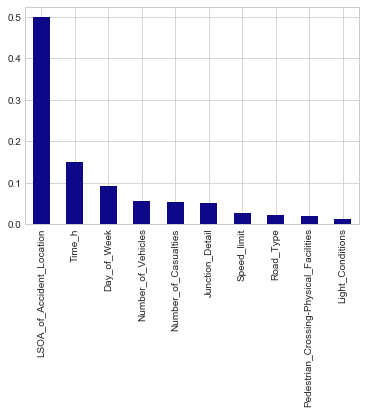

In [444]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

forest = ExtraTreesClassifier()
forest = forest.fit(x, y)
importances = forest.feature_importances_ 

model = SelectFromModel(forest, prefit=True)
X_new = model.transform(x)

forest.feature_importances_

plt.grid(b=None)
(pd.Series(forest.feature_importances_, index=x.columns)
   .nlargest(10)
   .plot(kind='bar', cmap = 'plasma')) 


## Determining Feature Importances - Police Attendance

In [378]:
fi_df = dataset
fi_df['Attend_or_Not'] = [1 if i == 1 else 0 for i in fi_df['Did_Police_Officer_Attend_Scene_of_Accident']]
#fi_df = fi_df.dropna(axis=0, subset=['LSOA_of_Accident_Location'])

#fi_df['LSOA_of_Accident_Location'] = fi_df['LSOA_of_Accident_Location'].replace('', np.nan)
fi_df = fi_df.dropna(axis=0, subset=['LSOA_of_Accident_Location'])

fi_df['LSOA_of_Accident_Location'] = fi_df['LSOA_of_Accident_Location'].factorize()[0]


fi_df = fi_df.drop(['Date', 'Time', 'ID', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
'Latitude', '1st_Road_Number', '2nd_Road_Number', 'Local_Authority_(Highway)', 'Local_Authority_(District)', 'Did_Police_Officer_Attend_Scene_of_Accident'], axis=1)
fi_df = fi_df.replace(-1, np.nan)
fi_df = fi_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


x = fi_df.iloc[:,0:16]
y = fi_df['Attend_or_Not']

print(y.value_counts())




1    275475
0     67523
Name: Attend_or_Not, dtype: int64


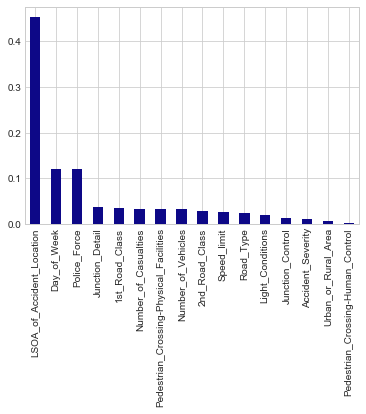

In [379]:
forest = ExtraTreesClassifier()
forest = forest.fit(x, y)
importances = forest.feature_importances_ 

model = SelectFromModel(forest, prefit=True)
X_new = model.transform(x)

forest.feature_importances_

plt.grid(b=None)
(pd.Series(forest.feature_importances_, index=x.columns)
   .nlargest(20)
   .plot(kind='bar', cmap = 'plasma')) 

## Mapping Accident Severity

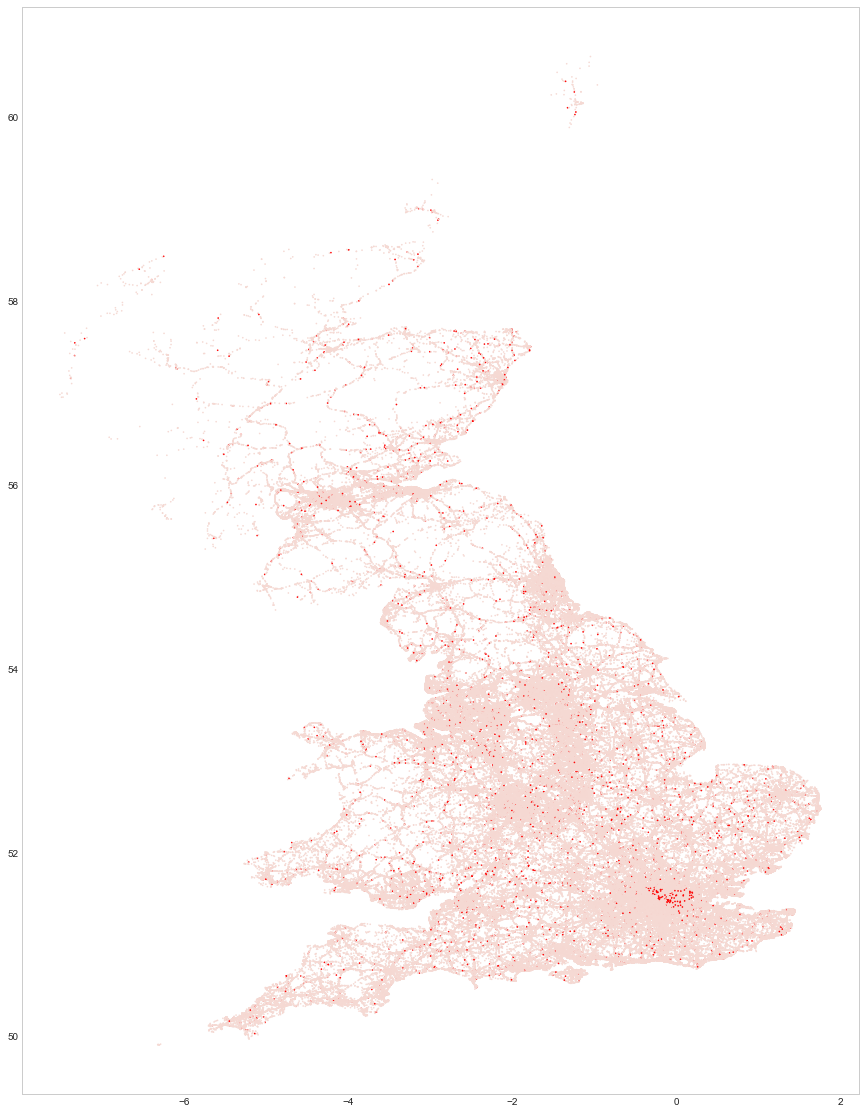

In [344]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

colors = {'Serious':'#F5D9D3', 'Fatal': 'Red', 'Slight':'#F5D9D3'}

plt.figure(figsize=(15,20))
#plt.axis('off')
plt.grid(b=None)

plt.scatter(df['Longitude'], df['Latitude'], c = df['Accident_Severity'].apply(lambda x: colors[x]), s=0.4)
plt.show()

## Mapping Police Attendace at the Scene of Accident

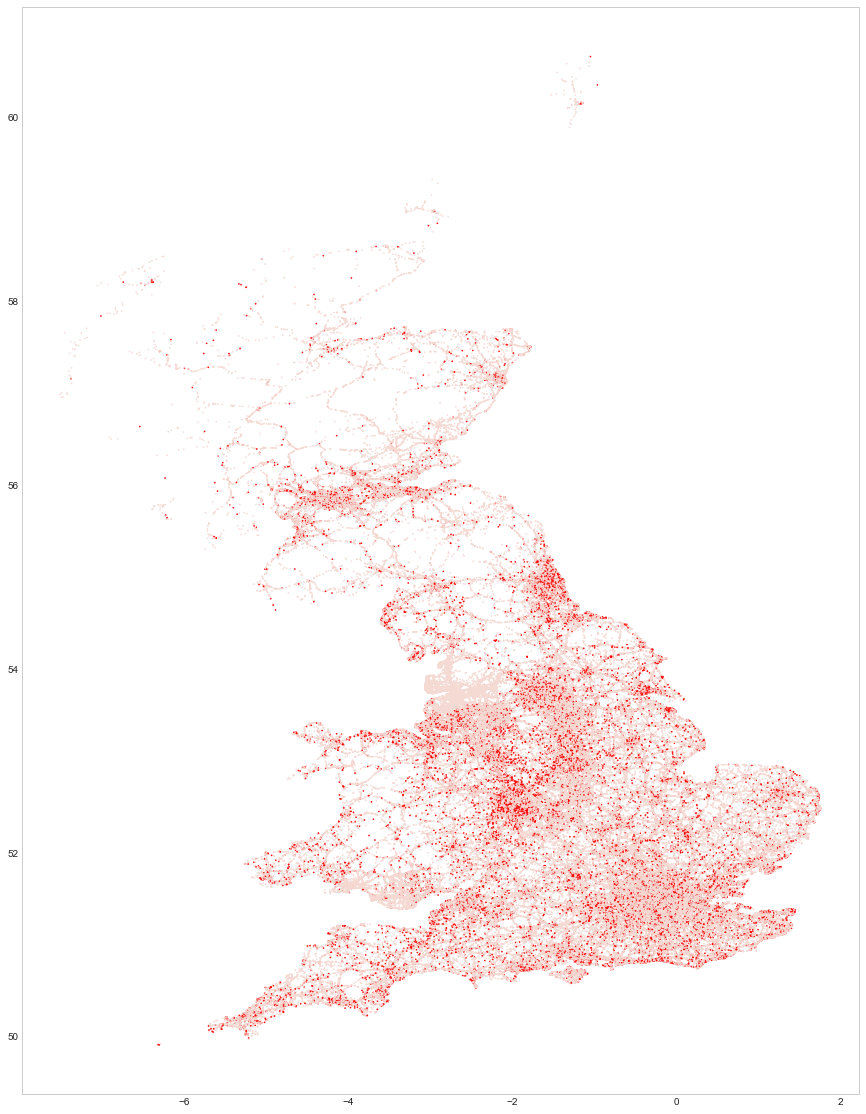

In [343]:
plt.style.use('seaborn-whitegrid')

colors = {'No':'Red', 'Yes': '#F5D9D3', 'No - accident was reported using a self completion  form (self rep only)':'Red', 'data missing': 'White'}

plt.figure(figsize=(15,20))
#plt.axis('off')
plt.grid(b=None)

plt.scatter(df['Longitude'], df['Latitude'], c = df['Did_Police_Officer_Attend_Scene_of_Accident'].apply(lambda x: colors[x]), s=0.4)
plt.show()

In [11]:
# import seaborn as sns
# sns.lmplot( x=df['Longitude'].values.tolist(), y=df['Latitude'].values.tolist(), data=df, hue=df['Accident_Severity'].values.tolist(), legend=False)
# plt.show()

In [12]:
import shapefile as shp
import geopandas as gpd

fp = r'lsoa_uk\lsoa\UK_2011_Census_Boundaries__LSOA.shp'

map_df = gpd.read_file(fp)
map_df

OBJECTID    AREA_ID                       AREA_NAME  MaxSimpTol  \
0          1001  E01025921  North West Leicestershire 006D          75   
1          1002  E01023929            Welwyn Hatfield 010A          75   
2          1003  E01011976                 Hartlepool 005D          75   
3          1004  E01011977                 Hartlepool 012C          75   
4          1005  E01011974                 Hartlepool 005B          75   
5          1006  E01025928  North West Leicestershire 001E          75   
6          1007  E01027916                      Selby 004D          75   
7          1008  E01027997                   Ashfield 010C          75   
8          1009  E01011975                 Hartlepool 005C          75   
9          1010  E01025929  North West Leicestershire 010A          75   
10         1011  E01022466                 Tewkesbury 003E          75   
11         1012  E01027917                      Selby 004E          75   
12         1013  E01027996                   Ashfield 010B          75   
13         1014  E01022467      Basingstoke and Deane 017A          75   
14         1015  E01027914                      Selby 004B          75   
15         1016  E01027995                   Ashfield 010A          75   
16         1017  E01011973                 Hartlepool 005A          75   
17         1018  E01022464                 Tewkesbury 003C          75   
18         1019  E01027915                      Selby 004C          75   
19         1020  E01027994                   Ashfield 012D          75   
20         1021  E01011970                 Hartlepool 001C          75   
21         1022  E01022465                 Tewkesbury 003D          75   
22         1023  E01027912                      Selby 006D          75   
23         1024  E01027993                   Ashfield 012C          75   
24         1025  E01011971                 Hartlepool 001D          75   
25         1026  E01030487                  Guildford 006B          75   
26         1027  E01030406            Epsom and Ewell 003C          75   
27         1028  E01022462                 Tewkesbury 002G          75   
28         1029  E01027913                      Selby 006E          75   
29         1030  E01027992                   Ashfield 006F          75   
...         ...        ...                             ...         ...   
42118     41971   95GG08S1                      Bellevue_1          75   
42119     41972   95GG08S2                      Bellevue_2          75   
42120     41973   95GG08S3                      Bellevue_3          75   
42121     41974   95GG07S1                    Beechmount_1          75   
42122     41975   95GG07S2                    Beechmount_2          75   
42123     41976   95GG07S3                    Beechmount_3          75   
42124     41977   95GG06S1                   Ballysillan_1          75   
42125     41978   95GG06S2                   Ballysillan_2          75   
42126     41979   95GG06S3                   Ballysillan_3          75   
42127     41980   95GG05S1                  Ballynafeigh_1          75   
42128     41981   95GG05S2                  Ballynafeigh_2          75   
42129     41982   95GG05S3                  Ballynafeigh_3          75   
42130     41983   95GG04S1                Ballymacarrett_1          75   
42131     41984   95GG04S2                Ballymacarrett_2          75   
42132     41985   95GG04S3                Ballymacarrett_3          75   
42133     41986   95GG03S1                Ballyhackamore_1          75   
42134     41987   95GG03S2                Ballyhackamore_2          75   
42135     41988   95GG03S3                Ballyhackamore_3          75   
42136     41989   95GG02S1                       Ardoyne_1          75   
42137     41990   95GG02S2                       Ardoyne_2          75   
42138     41991   95GG02S3                       Ardoyne_3          75   
42139     41992   95FF17W1                         The Cut          75   
42140     4

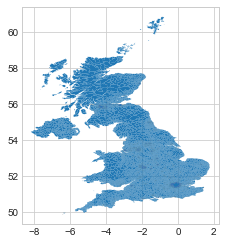

In [13]:
map_df.plot()

In [108]:
map_data = df
map_data = pd.DataFrame(map_data.groupby('LSOA_of_Accident_Location')['Number_of_Casualties'].sum())


c = pd.cut(
    map_data.stack(),
    [0, 10, 25, 40, 80, np.inf],
    labels=['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5']
)


map_data = map_data.join(c.unstack().add_suffix('_cat'))


map_data.reset_index(inplace=True)

merged = map_df.set_index('AREA_ID').join(map_data.set_index('LSOA_of_Accident_Location'))
merged.reset_index(inplace=True)


merged['Number_of_Casualties_cat'].fillna('Cat_1', inplace=True)

merged

AREA_ID  OBJECTID                       AREA_NAME  MaxSimpTol  \
0      E01025921      1001  North West Leicestershire 006D          75   
1      E01023929      1002            Welwyn Hatfield 010A          75   
2      E01011976      1003                 Hartlepool 005D          75   
3      E01011977      1004                 Hartlepool 012C          75   
4      E01011974      1005                 Hartlepool 005B          75   
5      E01025928      1006  North West Leicestershire 001E          75   
6      E01027916      1007                      Selby 004D          75   
7      E01027997      1008                   Ashfield 010C          75   
8      E01011975      1009                 Hartlepool 005C          75   
9      E01025929      1010  North West Leicestershire 010A          75   
10     E01022466      1011                 Tewkesbury 003E          75   
11     E01027917      1012                      Selby 004E          75   
12     E01027996      1013                   Ashfield 010B          75   
13     E01022467      1014      Basingstoke and Deane 017A          75   
14     E01027914      1015                      Selby 004B          75   
15     E01027995      1016                   Ashfield 010A          75   
16     E01011973      1017                 Hartlepool 005A          75   
17     E01022464      1018                 Tewkesbury 003C          75   
18     E01027915      1019                      Selby 004C          75   
19     E01027994      1020                   Ashfield 012D          75   
20     E01011970      1021                 Hartlepool 001C          75   
21     E01022465      1022                 Tewkesbury 003D          75   
22     E01027912      1023                      Selby 006D          75   
23     E01027993      1024                   Ashfield 012C          75   
24     E01011971      1025                 Hartlepool 001D          75   
25     E01030487      1026                  Guildford 006B          75   
26     E01030406      1027            Epsom and Ewell 003C          75   
27     E01022462      1028                 Tewkesbury 002G          75   
28     E01027913      1029                      Selby 006E          75   
29     E01027992      1030                   Ashfield 006F          75   
...          ...       ...                             ...         ...   
42118   95GG08S1     41971                      Bellevue_1          75   
42119   95GG08S2     41972                      Bellevue_2          75   
42120   95GG08S3     41973                      Bellevue_3          75   
42121   95GG07S1     41974                    Beechmount_1          75   
42122   95GG07S2     41975                    Beechmount_2          75   
42123   95GG07S3     41976                    Beechmount_3          75   
42124   95GG06S1     41977                   Ballysillan_1          75   
42125   95GG06S2     41978                   Ballysillan_2          75   
42126   95GG06S3     41979                   Ballysillan_3          75   
42127   95GG05S1     41980                  Ballynafeigh_1          75   
42128   95GG05S2     41981                  Ballynafeigh_2          75   
42129   95GG05S3     41982                  Ballynafeigh_3          75   
42130   95GG04S1     41983                Ballymacarrett_1          75   
42131   95GG04S2     41984                Ballymacarrett_2          75   
42132   95GG04S3     41985                Ballymacarrett_3          75   
42133   95GG03S1     41986                Ballyhackamore_1          75   
42134   95GG03S2     41987                Ballyhackamore_2          75   
42135   95GG03S3     41988                Ballyhackamore_3          75   
42136   95GG02S1     41989                       Ardoyne_1          75   
42137   95GG02S2     41990                       Ardoyne_2          75   
42138   95GG02S3     41991                       Ardoyne_3          75   
42139   95FF17W1     41992                         The Cut          75   
42140   95FF1

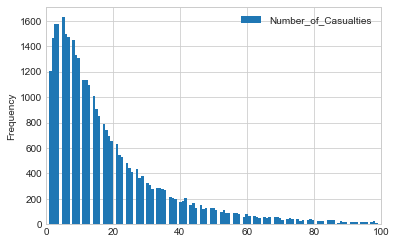

In [104]:
plt.grid(b=None)
map_data.plot.hist(bins=1000, xlim=(0,100))

In [109]:
merged['Number_of_Casualties_cat'].value_counts()

Cat_1    22101
Cat_2    11446
Cat_3     4362
Cat_4     3273
Cat_5      966
Name: Number_of_Casualties_cat, dtype: int64

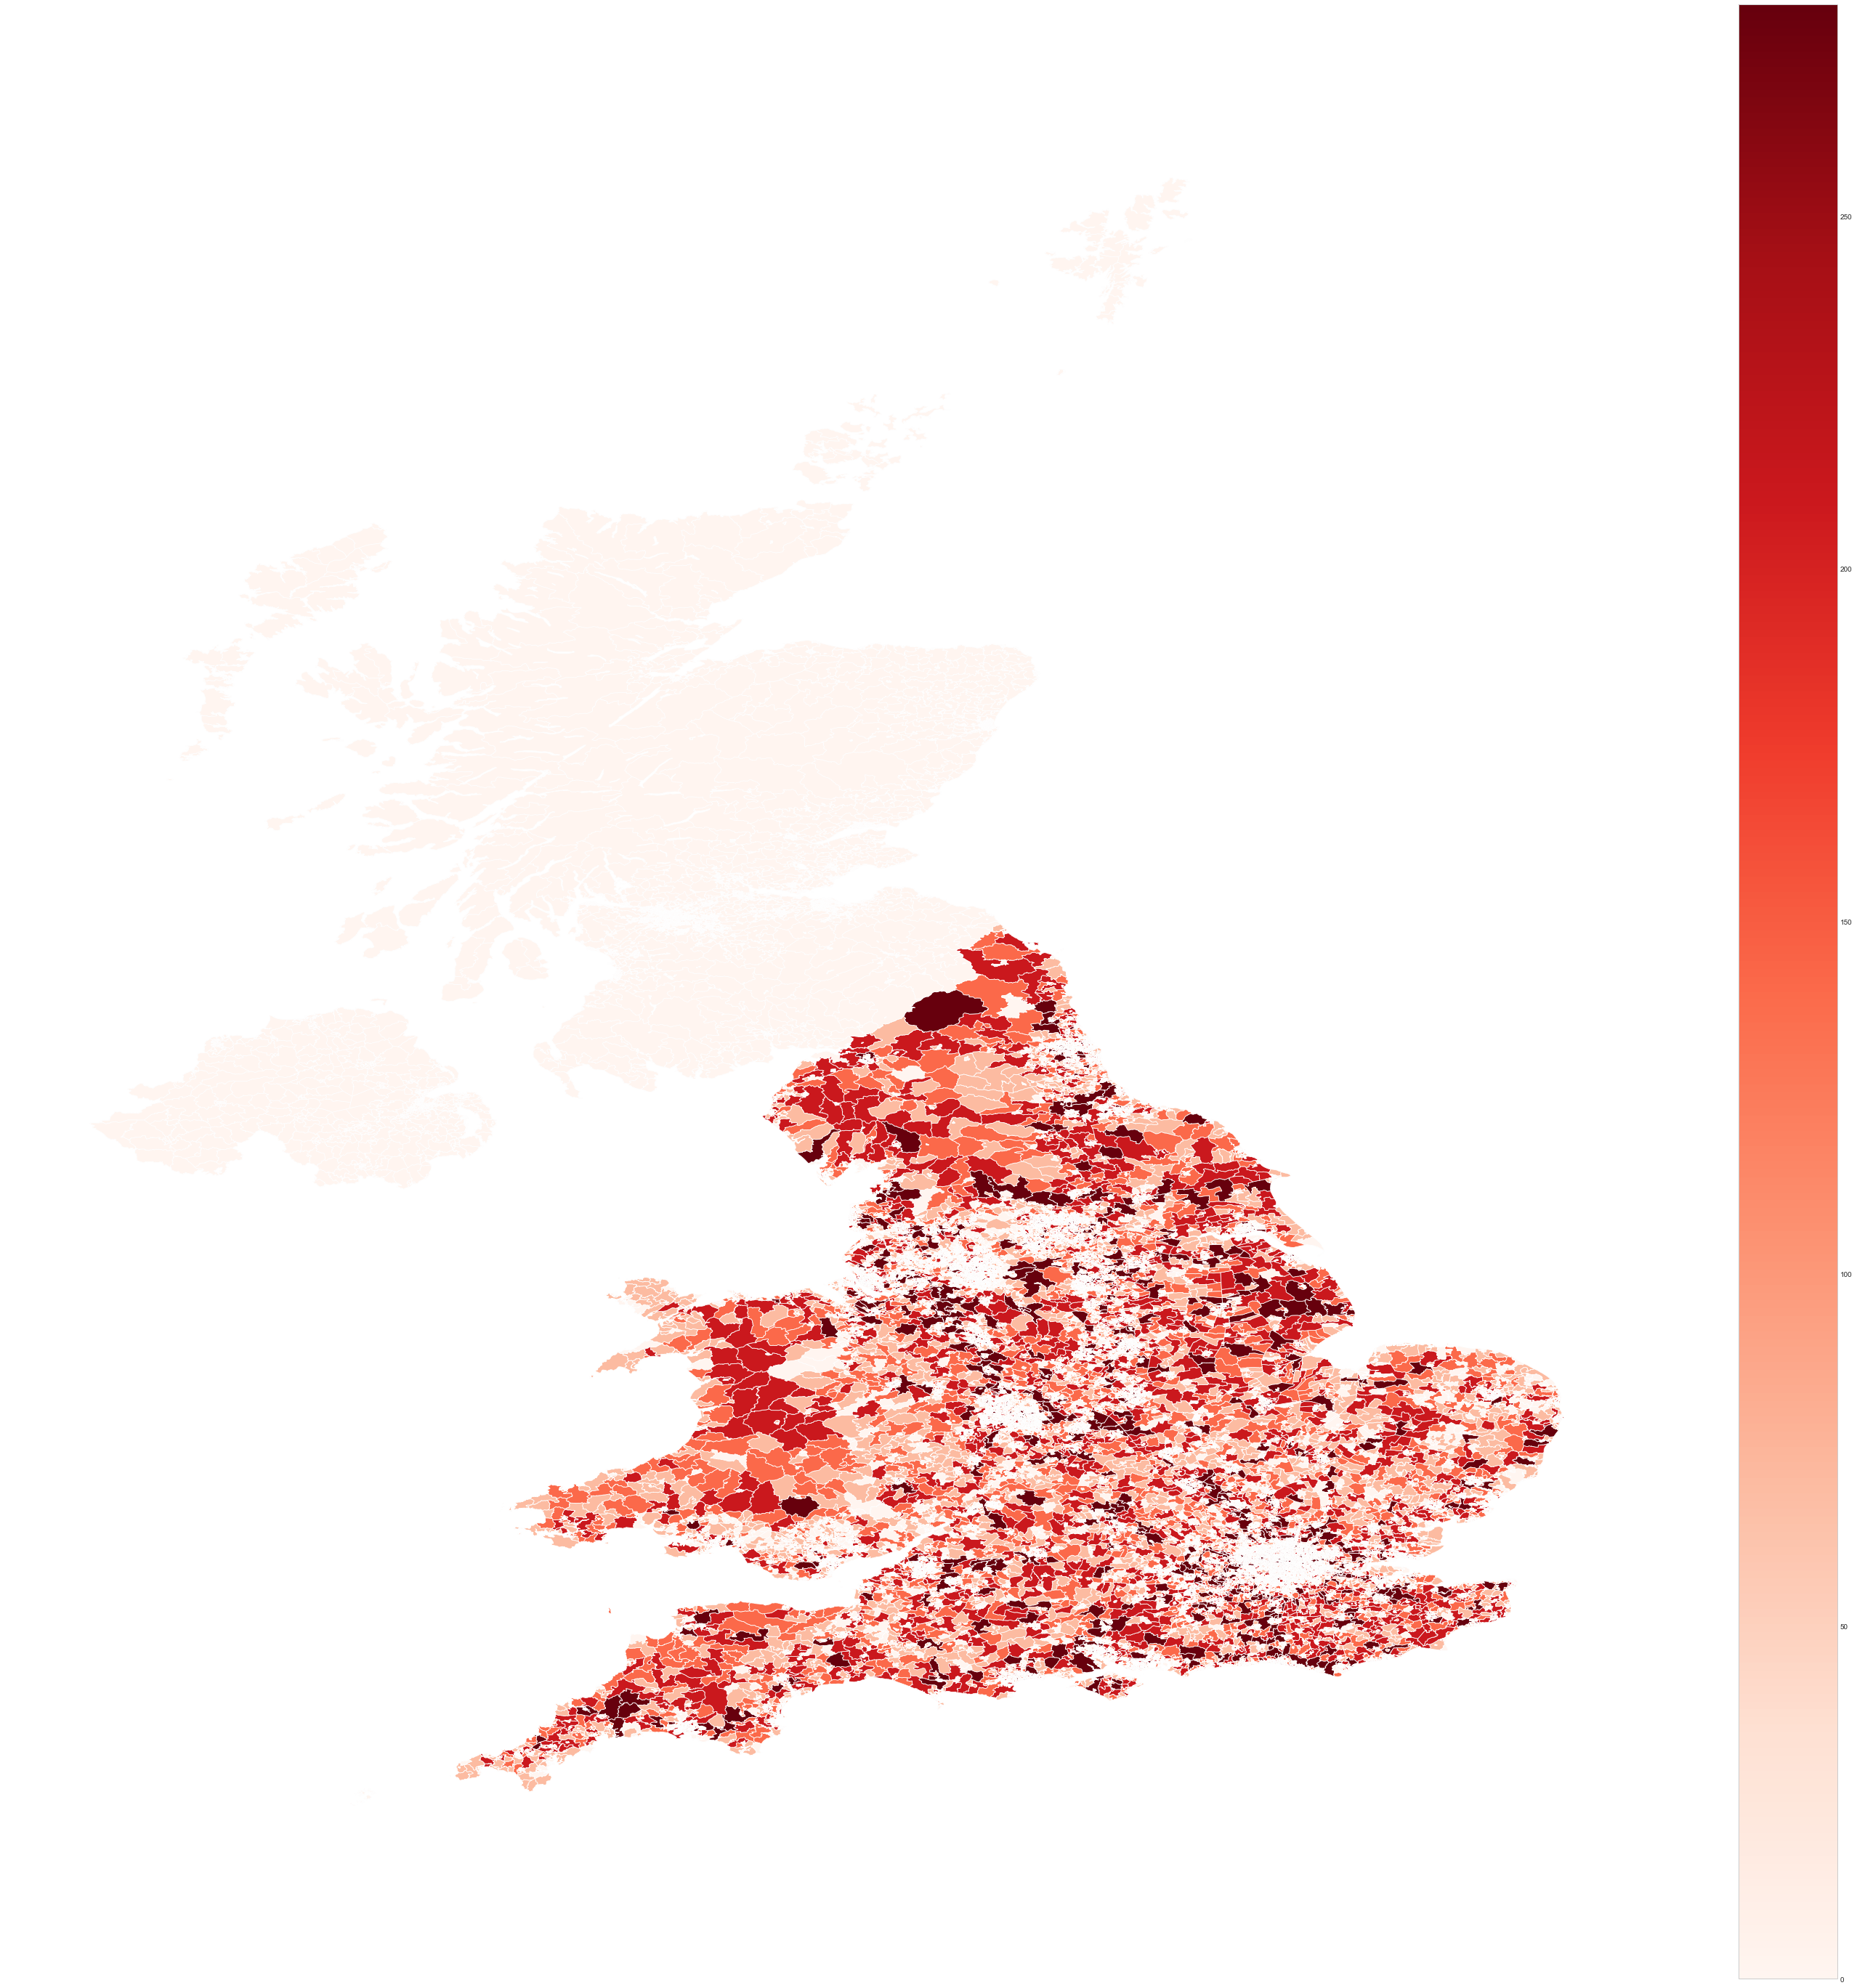

In [111]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Number_of_Casualties_cat'
# set the range for the choropleth
vmin, vmax = 0, 280

fig, ax = plt.subplots(1, figsize=(50, 50))
# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax)
#, edgecolor='2'

# remove the axis
ax.axis('off')


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

fig.savefig('sum_casualties_map.png', dpi=300)

### Accident Severity Map

In [205]:
map_data_1 = df
map_data_1['accident_code'] = pd.factorize(df['Accident_Severity'])[0] + 1

map_data_1 = pd.DataFrame(map_data_1.groupby('LSOA_of_Accident_Location')['accident_code'].mean())

map_data_1.reset_index(inplace=True)

merged_1 = map_df.set_index('AREA_ID').join(map_data_1.set_index('LSOA_of_Accident_Location'))
merged_1.reset_index(inplace=True)


merged_1['accident_code'].fillna(0, inplace=True)

merged_1

AREA_ID  OBJECTID                       AREA_NAME  MaxSimpTol  \
0      E01025921      1001  North West Leicestershire 006D          75   
1      E01023929      1002            Welwyn Hatfield 010A          75   
2      E01011976      1003                 Hartlepool 005D          75   
3      E01011977      1004                 Hartlepool 012C          75   
4      E01011974      1005                 Hartlepool 005B          75   
5      E01025928      1006  North West Leicestershire 001E          75   
6      E01027916      1007                      Selby 004D          75   
7      E01027997      1008                   Ashfield 010C          75   
8      E01011975      1009                 Hartlepool 005C          75   
9      E01025929      1010  North West Leicestershire 010A          75   
10     E01022466      1011                 Tewkesbury 003E          75   
11     E01027917      1012                      Selby 004E          75   
12     E01027996      1013                   Ashfield 010B          75   
13     E01022467      1014      Basingstoke and Deane 017A          75   
14     E01027914      1015                      Selby 004B          75   
15     E01027995      1016                   Ashfield 010A          75   
16     E01011973      1017                 Hartlepool 005A          75   
17     E01022464      1018                 Tewkesbury 003C          75   
18     E01027915      1019                      Selby 004C          75   
19     E01027994      1020                   Ashfield 012D          75   
20     E01011970      1021                 Hartlepool 001C          75   
21     E01022465      1022                 Tewkesbury 003D          75   
22     E01027912      1023                      Selby 006D          75   
23     E01027993      1024                   Ashfield 012C          75   
24     E01011971      1025                 Hartlepool 001D          75   
25     E01030487      1026                  Guildford 006B          75   
26     E01030406      1027            Epsom and Ewell 003C          75   
27     E01022462      1028                 Tewkesbury 002G          75   
28     E01027913      1029                      Selby 006E          75   
29     E01027992      1030                   Ashfield 006F          75   
...          ...       ...                             ...         ...   
42118   95GG08S1     41971                      Bellevue_1          75   
42119   95GG08S2     41972                      Bellevue_2          75   
42120   95GG08S3     41973                      Bellevue_3          75   
42121   95GG07S1     41974                    Beechmount_1          75   
42122   95GG07S2     41975                    Beechmount_2          75   
42123   95GG07S3     41976                    Beechmount_3          75   
42124   95GG06S1     41977                   Ballysillan_1          75   
42125   95GG06S2     41978                   Ballysillan_2          75   
42126   95GG06S3     41979                   Ballysillan_3          75   
42127   95GG05S1     41980                  Ballynafeigh_1          75   
42128   95GG05S2     41981                  Ballynafeigh_2          75   
42129   95GG05S3     41982                  Ballynafeigh_3          75   
42130   95GG04S1     41983                Ballymacarrett_1          75   
42131   95GG04S2     41984                Ballymacarrett_2          75   
42132   95GG04S3     41985                Ballymacarrett_3          75   
42133   95GG03S1     41986                Ballyhackamore_1          75   
42134   95GG03S2     41987                Ballyhackamore_2          75   
42135   95GG03S3     41988                Ballyhackamore_3          75   
42136   95GG02S1     41989                       Ardoyne_1          75   
42137   95GG02S2     41990                       Ardoyne_2          75   
42138   95GG02S3     41991                       Ardoyne_3          75   
42139   95FF17W1     41992                         The Cut          75   
42140   95FF1

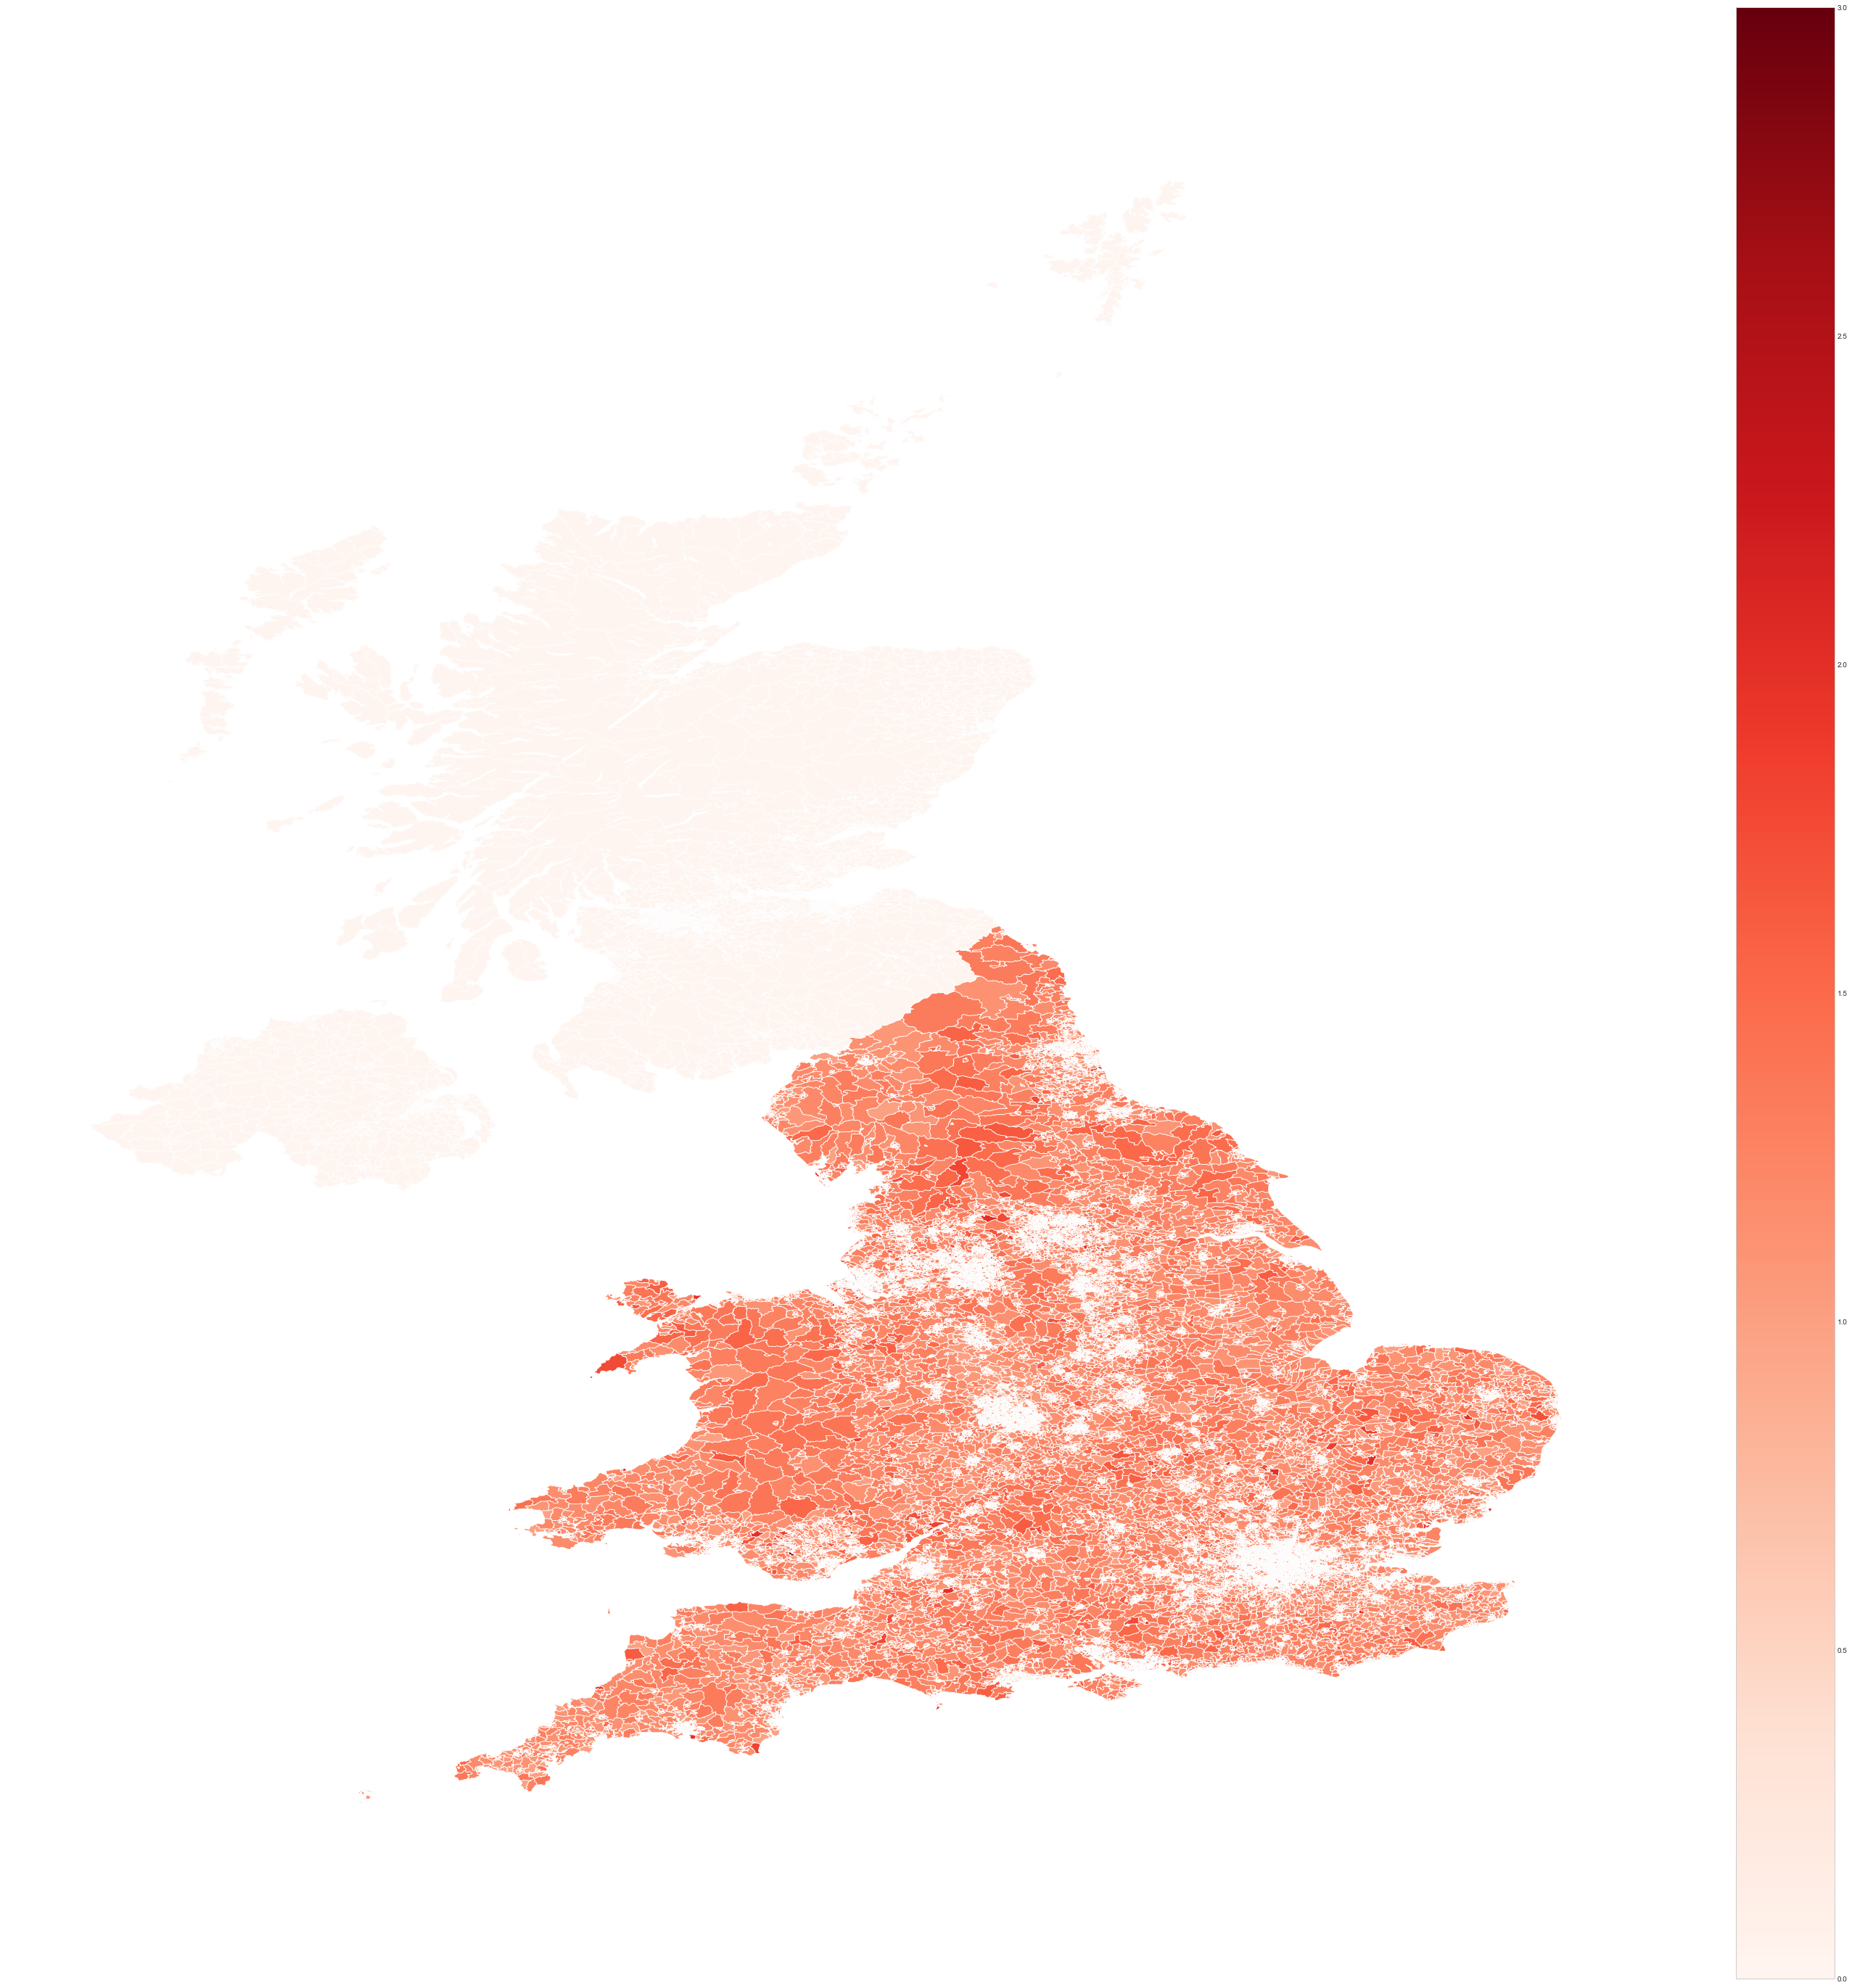

In [189]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'accident_code'
# set the range for the choropleth
vmin, vmax = 0, 3

fig, ax = plt.subplots(1, figsize=(50, 50))
# create map
merged_1.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='2')

# remove the axis
ax.axis('off')


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

fig.savefig('acc_severity_map.png', dpi=300)

### TSNE

In [445]:
t_data = data
t_data['LSOA_of_Accident_Location'] = t_data['LSOA_of_Accident_Location'].factorize()[0]
t_data['Local_Authority_(Highway)'] = t_data['Local_Authority_(Highway)'].factorize()[0]
t_data = t_data.drop(['Time', 'Date'], axis=1)
t_data = t_data.fillna('0')
t_data = t_data.sample(n=5000)

In [239]:
t_data.describe

<bound method NDFrame.describe of             ID Location_Easting_OSGR Location_Northing_OSGR Longitude  \
340981  340982                524329                 438040  -0.11265   
191797  191798                430635                 433451   -1.5364   
274305  274306                226630                 221500  -4.51942   
207557  207558                392568                 344156  -2.11219   
526295  526296                497334                 179982 -0.598833   
437270  437271                537060                 182750 -0.025628   
55332    55333                489434                 408638 -0.651062   
553295  553296                409956                 141266  -1.85898   
188526  188527                431407                 454610  -1.52251   
42047    42048                425531                 600152  -1.59947   
291729  291730                537620                 190930 -0.014339   
142976  142977                246240                 664220  -4.45748   
151906  151907   

In [240]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne2d = tsne.fit_transform(t_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.012s...
[t-SNE] Computed neighbors for 5000 samples in 0.448s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1131.850200
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.920975
[t-SNE] Error after 1000 iterations: 2.166328


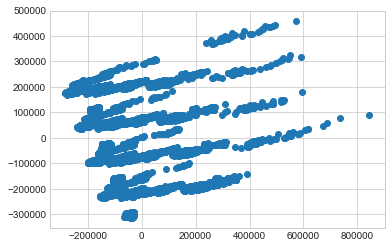

In [241]:
import matplotlib.pyplot as plt
plt.scatter(tsne2d[:, 0], tsne2d[:, 1])
plt.show()